In [1]:
##https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

import pandas as pd
import pandas_profiling
import re
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud  import WordCloud
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from PIL import Image
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chamj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data=pd.read_csv('data.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
df.duplicated().value_counts()

False    5836
True        6
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
# No null values

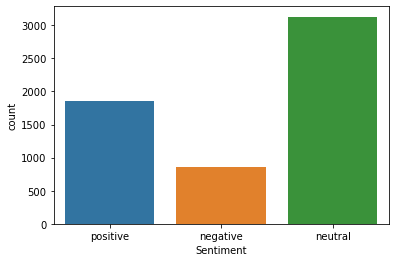

In [8]:
%matplotlib inline
sns.countplot(df['Sentiment'])
plt.show()

In [9]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [10]:
df.shape

(5842, 2)

In [11]:
# defininig a fuction which takes a column of sentences and does preprocessing of texts of sentences
def cleaning(df1):
    lowered=df1.lower()    # lowering the sentences 
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords from list
    df1=' '.join(df1) # joining back the words of list
    return(df1) # returning the cleaned words
        
        

In [12]:
df['Sentence']=df['Sentence'].apply(cleaning)

In [13]:
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps ...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubl...,positive
3,according finnish russian chamber commerce m...,neutral
4,swedish buyout firm sold remaining percen...,neutral


In [14]:
df.shape

(5842, 2)

In [15]:
# joining all the sentences.
corpus=' '.join(df['Sentence'])

In [16]:
# generating word cloud
word_cloud=WordCloud().generate(corpus)

In [17]:
img=word_cloud.to_image()

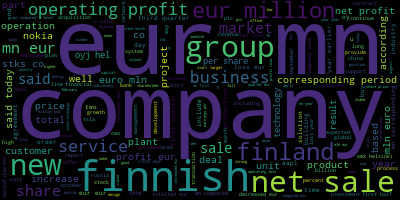

In [18]:
img

In [19]:

tfidf=TfidfVectorizer()
data=tfidf.fit_transform(df['Sentence'])
df_dtm = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names())


In [20]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_dtm.shape

(5842, 9297)

In [22]:
df.shape

(5842, 2)

In [23]:
df.index

RangeIndex(start=0, stop=5842, step=1)

In [24]:
df_dtm["Sentiment"]=df['Sentiment']

In [25]:
le=LabelEncoder()
df_dtm['Sentiment']=le.fit_transform(df_dtm['Sentiment'])

In [26]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [28]:
le_name_mapping #to know about how the mapping is done while label encoding

{'negative': 0, 'neutral': 1, 'positive': 2}

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_dtm.drop('Sentiment',axis=1),df_dtm['Sentiment'],test_size=0.3,stratify=df_dtm['Sentiment'])

In [36]:
X_train

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
932,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2571,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.184329,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4457,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2567,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2848,0.0,0.0,0.0,0.0,0.0,0.262217,0.0,0.0,0.0,0.000000,...,0.357075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3937,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn
import seaborn as sb

In [46]:
clf=RandomForestClassifier(criterion='entropy',
             n_estimators=100,max_depth=100, random_state=None,)

In [47]:
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100)

In [48]:
y_pred=clf.predict(X_test)

0.6246434683399886
              precision    recall  f1-score   support

           0       0.19      0.09      0.12       258
           1       0.62      0.87      0.73       939
           2       0.79      0.46      0.58       556

    accuracy                           0.62      1753
   macro avg       0.53      0.47      0.48      1753
weighted avg       0.61      0.62      0.59      1753

[[ 23 196  39]
 [ 94 817  28]
 [  6 295 255]]


<AxesSubplot:>

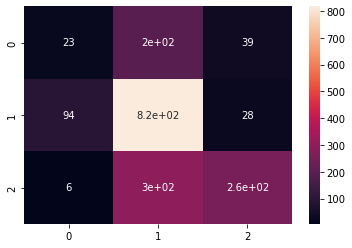

In [49]:
accuracy=sklearn.metrics.accuracy_score(y_test, y_pred)
print(accuracy)
report = classification_report(y_test, y_pred)
confMat = confusion_matrix(y_test, y_pred)
print(report)
print(confMat)
plt.figure(figsize = (6,4))
sb.heatmap(confMat, annot=True,)